### Subplot() function
- Function returns a typle of length two: a figure object as well as the relevant axes object

[ 4.09482632 -1.07485605]


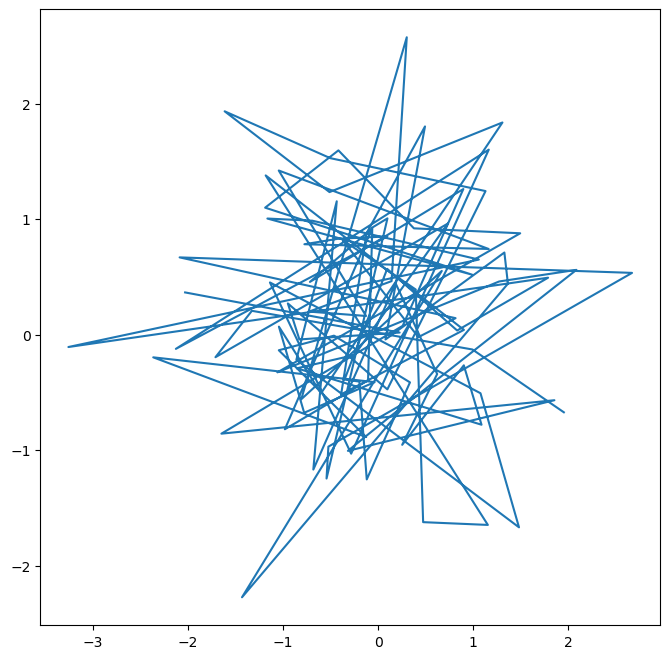

In [1]:
import numpy as np
from matplotlib.pyplot import subplots

rng = np.random.default_rng(1303)
print(rng.normal(scale=5, size=2))

# unpacking the tuple of length two into variables fig & ax
fig, ax = subplots(figsize=(8, 8))
x = rng.standard_normal(100)
y = rng.standard_normal(100)

# Will create a line plot by default
ax.plot(x, y);

# Equivalent, verbose code:
# output = subplots(figsize=(8, 8))
# fig = output[0]
# ax = output[1]

#### Creating a scatterplot
1. Adding an additional argument to **plot()** to make it into a scatterplot

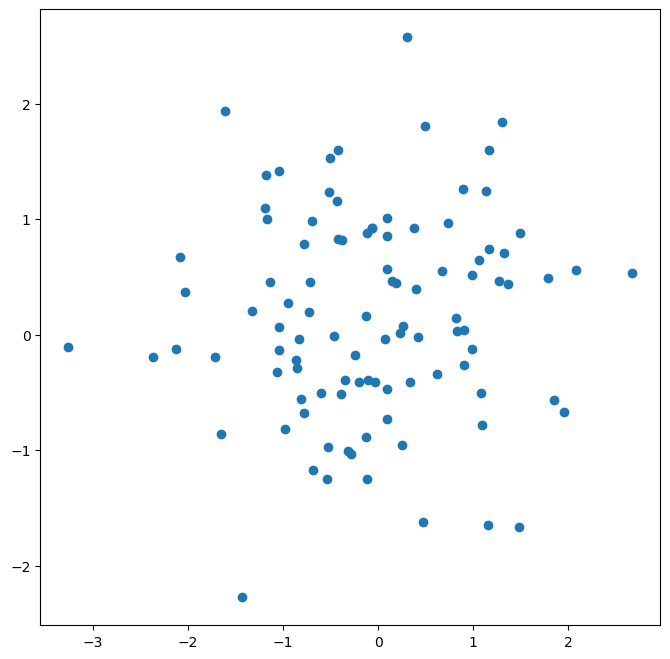

In [2]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(x, y, 'o');

2. Using **scatter()**

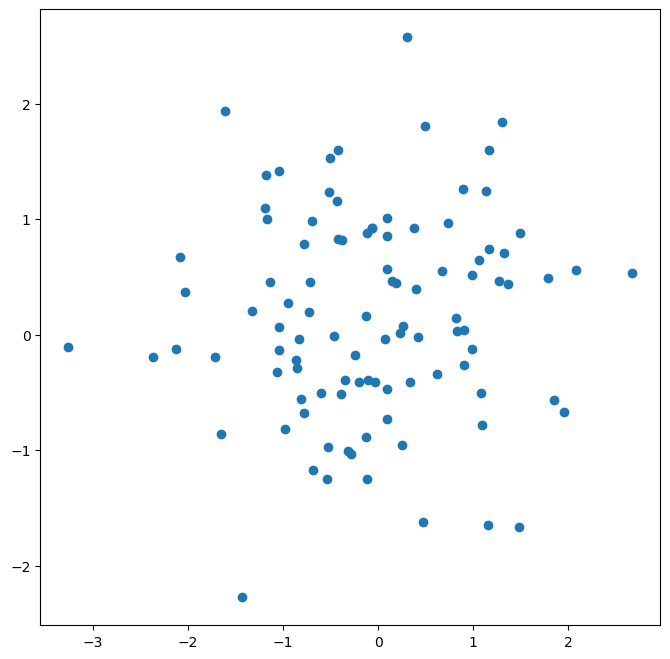

In [3]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker='o');

### Titling plot: *.set_xlabel(), .set_ylabel(), and .set_title()*

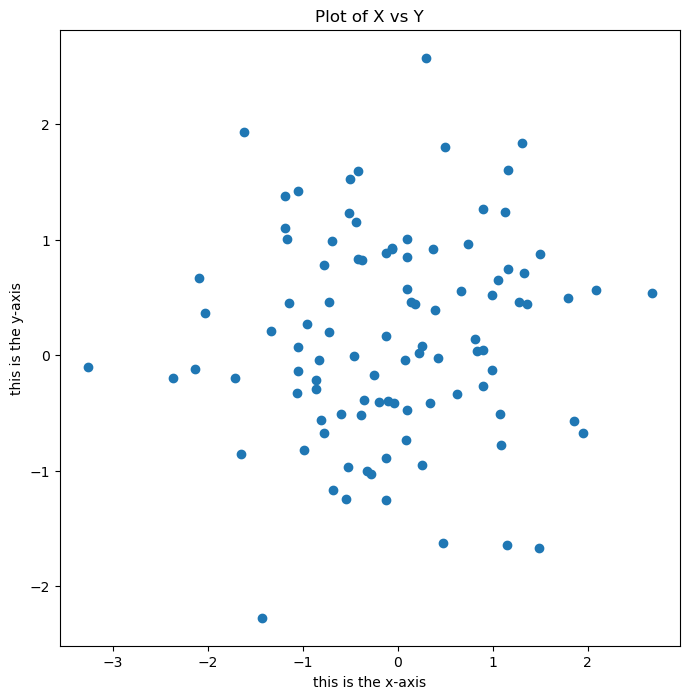

In [4]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker='o')
ax.set_xlabel("this is the x-axis")
ax.set_ylabel("this is the y-axis")
ax.set_title("Plot of X vs Y");

### Resizing plots and generating multiple plots
Having access to object *fig* means we can resdiplay the size

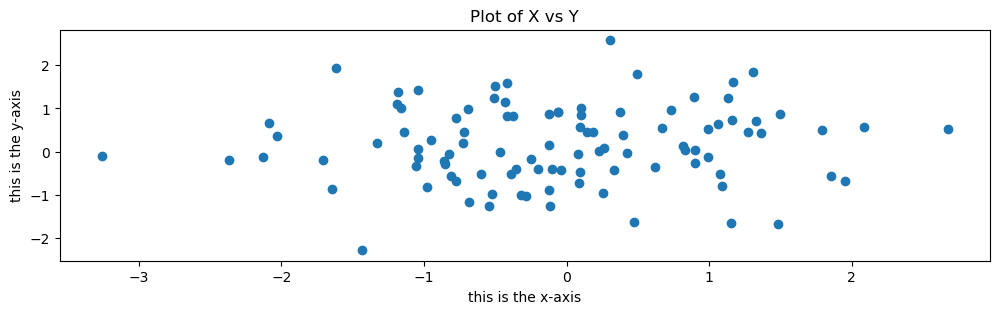

In [5]:
fig.set_size_inches(12,3)
fig

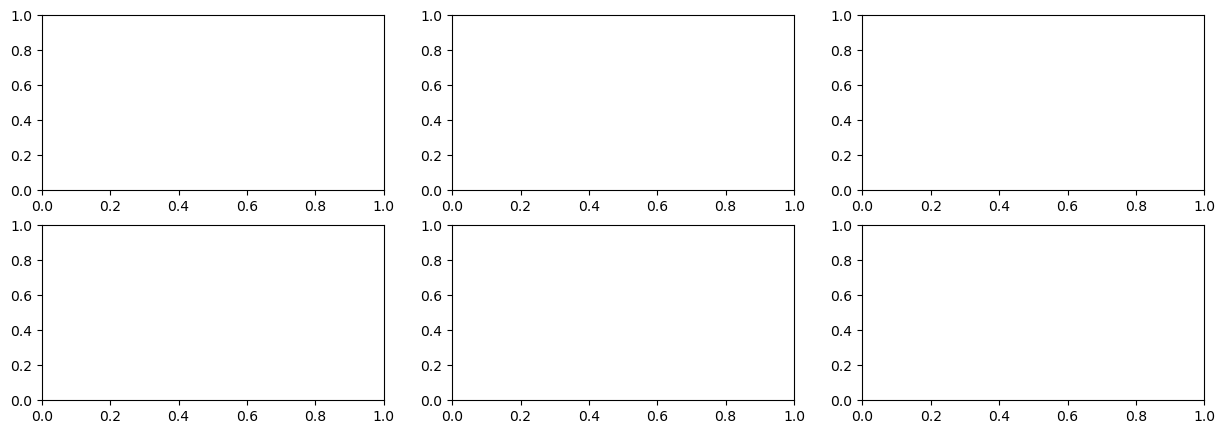

In [ ]:
# 2x3 grid of plots with size 15 by 5
fig, axes = subplots(nrows=2,
ncols=3,
figsize=(15, 5))

#### Generating a grid of mix plots

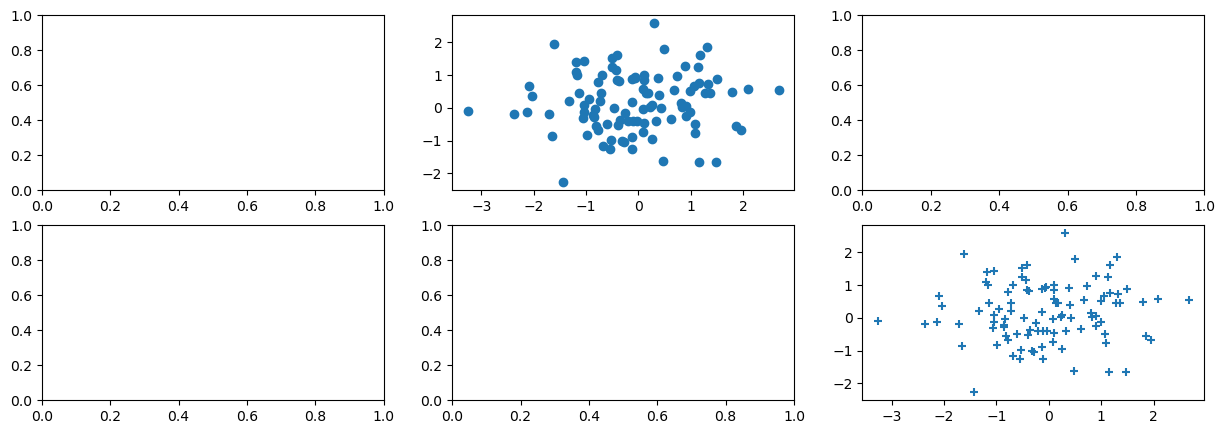

In [7]:
axes[0,1].plot(x, y, 'o')
axes[1,2].scatter(x, y, marker='+')
fig

### Sophisticated Plots
**.contour()** method produces a *contour plot* to represent 3-D data like a topographical map.
Takes 3 arguments: 
- A vector of x values (the frst dimension),
- A vector of y values (the second dimension), and
- A matrix whose elements correspond to the z value (the third dimension) for each pair of (x,y) coordinates.

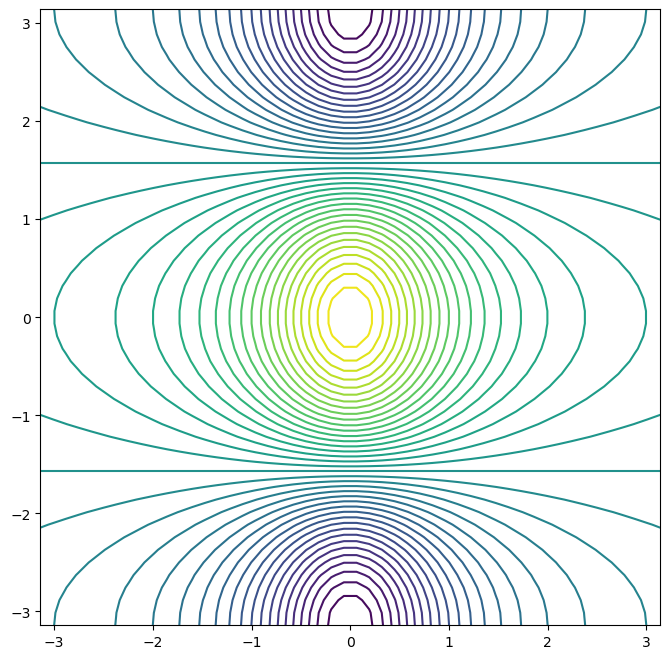

In [11]:
# Creating plot object
fig, ax = subplots(figsize=(8, 8))

# np.linspace(a, b, n) -> returns a vector of n numbers from a->b
x = np.linspace(-np.pi, np.pi, 50)
y=x
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2))

# Creating our contour plot, but adding levels to icnrease resolution
ax.contour(x, y, f, levels=45);

#### Heatmaps using imshow()
Produces a color-coded plot whose colors dependo on the z-value

In [ ]:
fig, ax = subplots(figsize=(8, 8))
ax.imshow(f);

## Sequences and Slice Notation
As seen above, we used **np.linspace()** to create sequence of numbers

In [14]:
seq1 = np.linspace(0, 10, 11)
seq1

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [16]:
# Creating a sequence of numbers spaced out by a step (default of 1 is used)
seq2 = np.arange(0, 10, 2)
seq2

array([0, 2, 4, 6, 8])

## 2.3.6 Indexing Data
Creating a 2-D numpy array and indexing to a particular element **A[row, col]**

In [23]:
A = np.array(np.arange(16)).reshape((4, 4))
print('Our 2-D array\n', A)
print('\nElement at [1,2]', A[1,2])

Our 2-D array
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

Element at [1,2] 6


### Indexing rows, columns, submatrices
#### Multiple rows

In [21]:
# Passing in a list to select rows
print(A[[1,3]])

# Selecting first and third columns, we pass ":" as the row argument to select all rows
print('\n', A[:,[0,2]])

[[ 4  5  6  7]
 [12 13 14 15]]

 [[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]]


#### Extracting Submatrices
The *convenience function* **np.ix_()** creates a *mesh* object

In [22]:
idx = np.ix_([1,3],[0,2,3])
A[idx]

array([[ 4,  6,  7],
       [12, 14, 15]])

Another method is to using slicing

In [24]:
# 1:4:2 captures the second and fourth items of a sequence, and 0:3:2 captures first and third items 
# The third element in a slice is the step size
A[1:4:2,0:3:2]

array([[ 4,  6],
       [12, 14]])

#### Boolean Indexing
As usual, even in numpy, boolean is a True or False value

In [ ]:
# Creating a vector of 0's with length equal to the first dimension of A. 
keep_rows = np.zeros(A.shape[0], bool)
print(keep_rows)

# Setting two of the elements = True
keep_rows[[1,3]] = True
print('\n', keep_rows)

# Showcasing that they are equal to integers (will print true)
print('\n', np.all(keep_rows == np.array([0,1,0,1])))

[False False False False]

 [False  True False  True]

 True


We can use our boolean vector to index through our array

In [ ]:
# This will only output the second and fourth rows as they are TRUE
A[keep_rows]

In [ ]:
# Create a boolean array of length equal to the number of columns in A
# Initially, all values are False — shape[1] returns the number of columns (2nd dimension at index 1)
keep_cols = np.zeros(A.shape[1], bool)

# Set the 0th, 2nd, and 3rd columns to True (i.e., we want to keep these columns)
keep_cols[[0, 2, 3]] = True

# Assume keep_rows is another boolean array (same length as number of rows in A)
# np.ix_ creates a tuple of index arrays suitable for fancy indexing
# It allows you to select specific rows and columns from a 2D array
idx_bool = np.ix_(keep_rows, keep_cols)

# Use the tuple of boolean arrays to index into A, extracting the selected rows and columns
A[idx_bool]